# Projet Régression Logistique

## Données : diabetes

Le projet de régression logistique consiste à réaliser un modèle de régression logistique à partir d'une table de données.
La table de données provient du site Kaggle et contient des informations de santé concernant des individus.
Ici, le projet consiste à réaliser un modèle de régression logistique censé déterminer si un individu quelconque est diabétique ou non.

Notre table de données contient 768 individus et 9 variables :
- Pregnancies : le nombre de grossesses
- Glucose : le taux de glucose
- BloodPressure : le niveau de pression sanguine
- SkinThickness : l'épaisseur de la peau
- Insulin : le taux d'insuline
- BMI : l'indice de masse corporelle
- DiabetesPedigreeFunction
- Age
- Outcome : vaut 1 si l'individu est déclaré diabétique, 0 sinon

L'ensemble de ces variables sont des variables quantitatives, à l'exception de la variable "Outcome" qui est une variable categorielle(binaire) mais aussi la variable cible.

In [1]:

import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sb

In [4]:
import scipy.stats as stats

In [5]:
import statsmodels.api as sm

In [6]:
from statsmodels.formula.api import ols

In [7]:
diabete = pd.read_csv('diabetes2.csv',sep=',',decimal='.')

Voici un aperçu de la table de données

In [8]:
diabete

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Sur cette table, nous avons procédé à différentes analyses en vue de mettre en place un modèle de régression logistique

## Présence de valeurs manquantes/aberrantes ?

Avant de procéder aux analyses statistiques sur notre table, nous nous sommes interrogés sur la présence ou non de valeurs aberrantes voire manquantes.
Lors de la lecture de la table, nous avons constaté la présence de plusieurs zéros qui semblent être des valeurs aberrantes dans le cas de ces variables :
- Glucose => absence de glucose ?
- BloodPressure => pas de pression sanguine chez l'individu ?
- SkinThickness => absence de peau ?
- BMI => l'individu pèserait 0 kilogrammes ?

La première idée à laquelle nous avons pensé était de supprimer les individus concernées par ces valeurs, ce qui serait revenu à supprimer environ un quart des données de la table.
Comme cela revient à supprimer un nombre trop important de données, et donc d'informations, nous avons choisi d'émettre l'hypothèse qu'il s'agit de valeurs manquantes.
Nous avons finalement choisi de conserver ces valeurs manquantes car nous avons pensé que les informations en question n'ont pas pu être enseignés lors de l'examen de l'individu.

## Tableau de statistiques descriptives

Comme précisé précédemment, nous allons procéder à réaliser deux analyses statistiques : 
- Une analyse univariée
- Une analyse bivariée

Mais avant de procéder à l'analyse univariée, nous vons présentons un tableau de statistiques descrptives de l'ensemble des variables (à l'exception de la variable "Outcome" car il s'agit pour rappel d'une variable catégorielle). Pour cela, on va construire deux variables X et Y qui contiennent respectivement les variables explicatives et la variable cible.

In [9]:
X = diabete.drop('Outcome',axis=1)

In [10]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [11]:
Y = diabete['Outcome']

## Analyse univariée

L'analyse univariée consiste à analyser les données d'une seule variable.

Cependant, il faut savoir à quel type de données nous avons à faire avant de faire cette analyse.
Pour l'ensemble des variables, l'analyse est déjà faite à l'exception des variables Pregnancies, Age et Outcome.
En effet, ces trois variables ont la particularité de présenter en soi les nombres entiers : on peut donc y faire pour chacune d'entre elles un tableau recensant les occurences de leurs valeurs présentes.

### Pregnancies 

In [12]:
X.Pregnancies.value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

### Age

In [13]:
X.Age.value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
32    16
36    16
38    16
45    15
34    14
40    13
43    13
46    13
39    12
35    10
50     8
44     8
51     8
52     8
58     7
47     6
54     6
57     5
60     5
48     5
49     5
53     5
55     4
62     4
63     4
66     4
56     3
59     3
65     3
67     3
61     2
69     2
72     1
64     1
68     1
70     1
81     1
Name: Age, dtype: int64

### Outcome

In [14]:
Y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Analyse bivariée 

Maintenant que nous avons fait l'analyse univariée, on peut procéder à l'analyse bivariée.

Pour cela, nous avons construit une matrice de corrélations qui renseigne les coefficients de corrélation entre chaque variable. Ici, nous avons d'abord fait une matrice "classique" qui recense les coefficients de corrélation, puis nous en avons réalisé une autre version avec un code couleur afin de mieux mettre en avant les niveaux de corrélation.

In [15]:
diabete.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


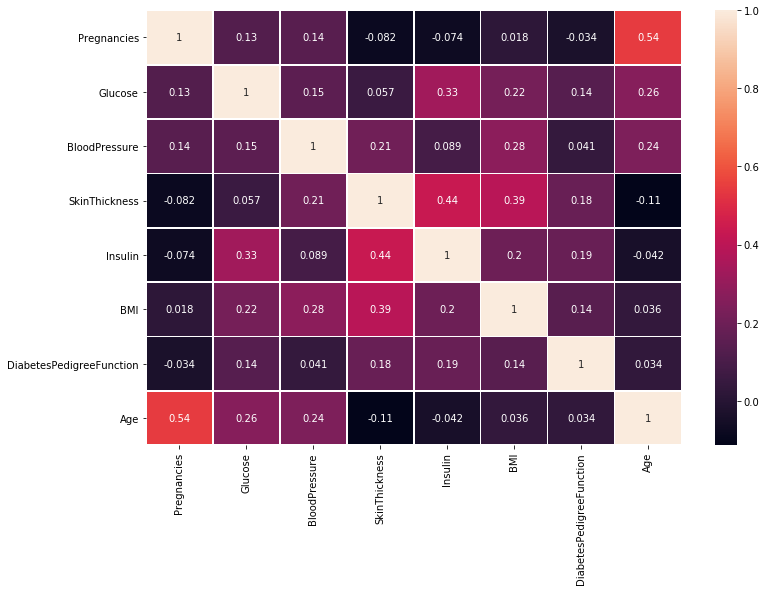

In [16]:
plt.subplots(figsize =(12,8))
sb.heatmap(X.corr(),linewidth=0.75, annot=True)

Dans l'ensemble, les coefficients de corrélation entre variables explicatives sont proches de 0, ce qui signifie qu'il n'y a pas vraiment de corrélation entre elles. Le coefficient de corrélation le plus élevé est égal à 0.56 et on l'obtient pour les variables Age et Pregnancies. On obtient aussi un coefficient de 0.42 entre Insulin et SkinThickNess et 0.39 entre SkinThickNess et BMI.

Après la matrice de corrélations, on décide de faire une analyse de la variance ANOVA afin de savoir quelle(s) variable(s) explicative(s) aurait une influence sur le diagnostic du patient.

In [17]:
diabete_lm = ols('Outcome ~ Pregnancies+Glucose+BloodPressure+SkinThickness+Insulin+BMI+DiabetesPedigreeFunction+Age',
                 data=diabete).fit()

In [18]:
resultat = sm.stats.anova_lm(diabete_lm, type = 1)
resultat

,df,sum_sq,mean_sq,F,PR(>F)
Pregnancies,1.0,8.591143,8.591143,53.638189,6.164705e-13
Glucose,1.0,34.020758,34.020758,212.406175,1.327103e-42
BloodPressure,1.0,0.123476,0.123476,0.770911,3.802132e-01
SkinThickness,1.0,0.863789,0.863789,5.393003,2.048132e-02
Insulin,1.0,0.255349,0.255349,1.594251,2.071077e-01
BMI,1.0,6.780158,6.780158,42.331432,1.398272e-10
DiabetesPedigreeFunction,1.0,1.817752,1.817752,11.349002,7.929848e-04
Age,1.0,0.458924,0.458924,2.865257,9.092163e-02
Residual,759.0,121.567819,0.160168,NaN,NaN


D'après l'analyse de la variance (ANOVA) entre la variable dépendante et les variables explicatives, on observe que la variable cible semble dépendante de certaines variables explicatives car leur p-value est inférieure à 5%. Il s'agit des variables Pregnancies, Glucose, SkinThickNess, BMI et DiabetesPedigreeFunction.

Les variables pour lesquels il y aurait indépendance sont BloodPressure (38%), Insulin (20,7%) et Age (9,1%)

## La Modèlisation du problème par la regression logistique

La premiere des choses est de diviser notre echantillon en deux :Un ensemble d'entrainement pour 80% de nos données
et un ensemble test pour 20% de nos données .

A la fin de la modelisation on va essayer de voir si les valeurs predites par 
notre modele se rapprochent du vraies valeurs de l'ensemble de test.

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2)

In [20]:
print(X_train.shape) # Il s'agit de l'ensemble d'entrainement contenant 614 individus 
print(y_train.shape)
print(X_test.shape) # Il s'agit de l'ensemble  de test contenant lui 154 individus
print(y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


#### Quelles sont les caracteristiques des individus detectés diabetiques ?

In [21]:

from sklearn.linear_model import LogisticRegression
clr = LogisticRegression()
result = clr.fit(X_train,y_train)
#y_pred = clr.predict(X_train)

coef =dict(zip(X, zip(clr.coef_[0])))
coef


D:\Candidature\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'Pregnancies': (0.12131906371108474,),
 'Glucose': (0.025399449030519574,),
 'BloodPressure': (-0.015787921345783676,),
 'SkinThickness': (-0.00026816689290316636,),
 'Insulin': (-0.0003127543247640391,),
 'BMI': (0.051521471141187006,),
 'DiabetesPedigreeFunction': (0.6765946780113818,),
 'Age': (0.007642915358680844,)}

#### On observe que les variables Age,Glucose et BMI,Pregnancies ont des coefficients positifs .
On peut dire les individus jeunes ont tendance à ne pas etre detecté diabetique .
Plus l'IMC de l'individu est grand ,moins il a de chance d'etre detecté diabetique
La quantité de glucose dans le sang  augmente avec le fait d'etre detecté diabetique.
Le nombre de fois que le patient soit enceinte augmente la detection de la maladie de diabete

#### Par contre les variables Insulin,BloodPressure dimunient avec la detection d'un individu d'etre diabetique car leurs  coefficients  sont negatifs.


### Les odds ratios ou rapport de cote

Par definition ,le rapport de cote est une mesure statistique qui indique par exemple le rapport de cote d'un individu jeune d'avoir le diabete avec celle d'un individu plus agé .

Un rapport des cotes de 1 correspond à l'absence d'effet. En cas d'effet bénéfique, le rapport des cotes est inférieur à 1 et il est supérieur à 1 en cas d'effet délétère.

Plus le rapport des cotes est éloigné de 1, plus l'effet est important.

Il est calculé par Odds = Exp(coefficient)

In [22]:
import numpy as np 
odds = [np.math.exp(x) for x in clr.coef_[0]] # La variable odds contient l'ensemble des rapports de cote de chaque variable explicative
coef = dict(zip(X, zip(clr.coef_[0], odds))) # Il s'agit d'un dictionnaire contenant les coefficients et rapoort de cote ensemble
coef
# Nous allons creer un DataFrame pour bien rentre visible
OddsRatio =pd.DataFrame.from_dict(coef, orient='index',columns=['Coefficient','Rapport de cote'])
OddsRatio



,Coefficient,Rapport de cote
Pregnancies,0.121319,1.128985
Glucose,0.025399,1.025725
BloodPressure,-0.015788,0.984336
SkinThickness,-0.000268,0.999732
Insulin,-0.000313,0.999687
BMI,0.051521,1.052872
DiabetesPedigreeFunction,0.676595,1.967167
Age,0.007643,1.007672


D'après le résultat ci-dessus, la première valeur numérique est le coefficient, la seconde est le rapport de cotes pour la caractéristique donnée. Gardez à l'esprit que notre variable dépendante, ce que nous essayons de classer, est de savoir si un individu souffrira ou non de diabète. Voici quelques exemples de la façon dont vous pouvez interpréter les rapports de cotes ci-dessus:

Âge: Pour chaque année supplémentaire, les chances de souffrir de diabète sont 1,007 fois plus importantes.

IMC: Pour chaque augmentation de 1 de l'IMC, les chances d'avoir le diabète sont 1,11 fois plus importantes.


### Matrice de Confusion

La premiere façon de regarder si le modele a marché est la matrice de confusion

In [66]:
from sklearn.metrics import confusion_matrix 
conf = confusion_matrix(y_test, clr.predict(X_test))
conf



array([[92,  7],
       [25, 30]], dtype=int64)

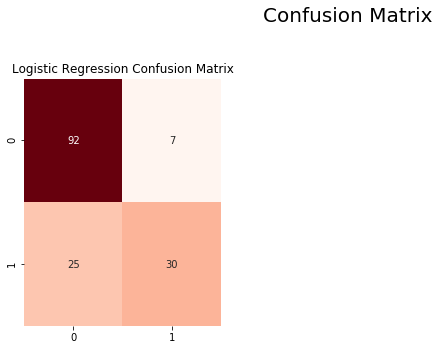

In [85]:
plt.figure(figsize=(12,10))

plt.suptitle("Confusion Matrix",fontsize=20)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sb.heatmap(conf,cbar=False,annot=True,cmap="Reds",fmt="d")

Les coefficients sur la diagonale indique les éléments bien classés ici au total notre modele a bien classé 122 individus , les coefficients en dehors de ceux que le classifieur a mis dans la mauvaise classe.Il n'a pas parvenu à bien classer 32 individus s'ils sont diabetiques ou non .

In [24]:
y_pred = clr.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

### Le score 

In [52]:

score = clr.decision_function(X_test)
sc= pd.DataFrame(data=score,columns =['SCORE']).sort_values('SCORE')
sc



,SCORE
4,-4.658535
3,-3.029585
39,-2.990045
116,-2.784877
126,-2.715399
40,-2.666800
36,-2.594103
41,-2.506010
54,-2.462121
105,-2.313560


#### Quels sont les patients les plus risqués ??
Pour essayer de bien savoir le degré de risque d'etre diabetique ,On attribue chaque patient à un score.

Le score permet de classer les patients du moins risqué d'avoir le diabete au plus risqué .

On voit bien que le 4eme patient presente le score le plus faible c'est à dire qu'il 
est le plus  risqué d'avoir le diabete .

Le 120eme patient presente le score le plus grand c'est dire qu'il est le moins risqué .

#### Probabilité du risque 
Dans la regression logistique ,La notion de probaiblité de chances d'etre risqué avoir le diabete est plus preferable que la notion de score . 

In [70]:
proba = clr.predict_proba(X_test)
pb = pd.DataFrame(data=proba,columns =['risqué avec probabilité','Non risqué avec probabilité']).sort_values('risqué avec probabilité')
pb


,risqué avec probabilité,Non risqué avec probabilité
120,0.117692,0.882308
42,0.130443,0.869557
111,0.161235,0.838765
109,0.164348,0.835652
5,0.188704,0.811296
11,0.203211,0.796789
21,0.234815,0.765185
27,0.246483,0.753517
139,0.269117,0.730883
123,0.285138,0.714862


On voit tres bien que la notion de probibilité concorde avec avec la notion du score definit en haut  et donne la meme interpretation

On voit bien que le 4eme patient presente la probabilité le plus grand c'est à dire qu'il 
est le plus  risqué d'avoir le diabete .

Le 120eme patient presente la probabilité la plus faible c'est dire qu'il est le moins risqué .


In [83]:
import pandas 
score = clr.decision_function(X_test)
dfsc = pandas.DataFrame(score, columns=['score']).sort_values('score')
dfsc['Diabetique'] = y_test.values
dfsc

,score,Diabetique
4,-4.658535,0
3,-3.029585,0
39,-2.990045,0
116,-2.784877,0
126,-2.715399,0
40,-2.666800,1
36,-2.594103,1
41,-2.506010,0
54,-2.462121,0
105,-2.313560,1


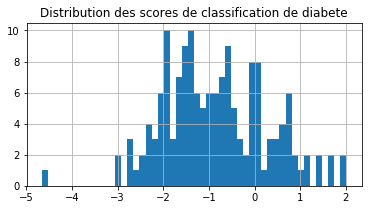

In [87]:
ax = dfsc['score'].hist(bins=50, figsize=(6,3))
ax.set_title('Distribution des scores de classification de diabete');

#### Dans le graphique ci-dessous ,on voit que notre classifieur construit à partir de la regression logistique separe (Frontiere) les individus detectés diabétiques et les individus non diabétiques .

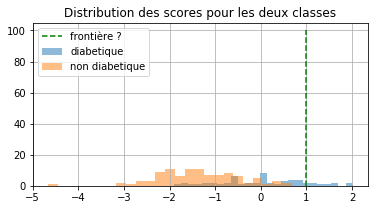

In [58]:
ax = dfsc[dfsc['Diabetique'] == 1]['score'].hist(bins=25, figsize=(6,3), label='diabetique', alpha=0.5)
dfsc[dfsc['Diabetique'] == 0]['score'].hist(bins=25, ax=ax, label='non diabetique', alpha=0.5)
ax.set_title("Distribution des scores pour les deux classes")
ax.plot([1, 1], [0, 100], 'g--', label="frontière ?")
ax.legend();

#### On va construire une courbe à partir des faux positifs et vrais positifs .

In [60]:
dftp = pandas.DataFrame(dict(fpr=fpr0, tpr=tpr0, threshold=thresholds0)).copy()
dftp.head(n=2)

,fpr,tpr,threshold
0,0.0,0.000000,1.990609
1,0.0,0.010101,0.990609


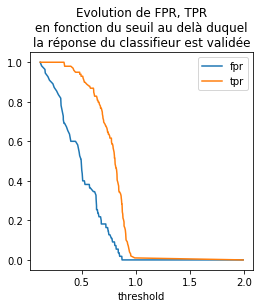

In [61]:
ax = dftp.plot(x="threshold", y=['fpr', 'tpr'], figsize=(4, 4))
ax.set_title("Evolution de FPR, TPR\nen fonction du seuil au delà duquel\n" +
             "la réponse du classifieur est validée");

### La courbe ROC ou Receiver operating characteristic

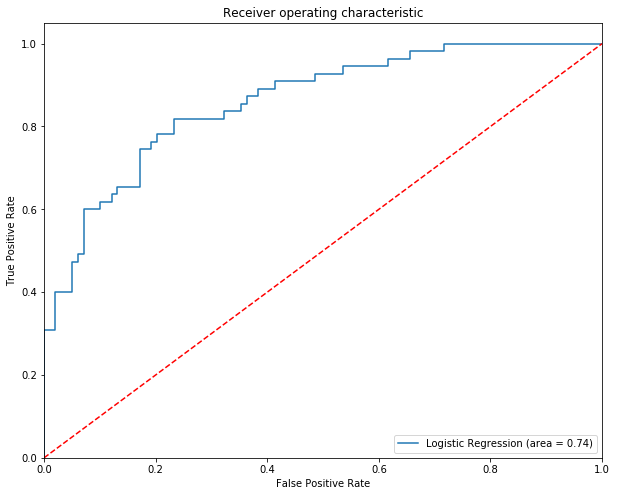

In [62]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
# Calculate ROC Values

logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, clr.predict_proba(X_test)[:,1])
# Plot ROC Curve
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


#### La courbe ROC, ou courbe de caractéristiques de fonctionnement du récepteur, est un autre outil courant utilisé pour traiter les classificateurs binaires. Dans notre cas ,l'aire sous la courbe ou AUC est égale à 0.74 .